<a href="https://colab.research.google.com/github/RKS8347/DL-projects/blob/main/VIRUS_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# problem statement
# To classify the virus(malware) images using Convoluton Neural Network.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')

In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,hash
0,2,0,199,51,23,0,0,227,255,127,...,0,0,0,0,0,0,0,0,0,24ced6eb4c3b6b16e6d911401ca9b9bf
1,6,0,0,4,24,56,93,220,101,80,...,72,142,247,1,247,27,121,109,75,9c9133f89cf857325fd041ca8640d51b
2,9,116,139,255,244,252,137,139,139,255,...,108,73,3,105,85,183,102,171,7,13544f465094166da9ad6f04833c4a7f
3,1,64,195,0,80,0,200,139,51,84,...,64,158,0,52,55,38,65,174,245,351e6e7a74a58fe57b323925d30b3943
4,7,255,4,0,73,3,15,0,48,15,...,9,0,10,11,186,0,10,13,128,6b537c7aa5719b881e2039bb055fa09f


In [ ]:
len(test)

3458

In [ ]:
len(train)

48422

In [ ]:
train['label'].unique()

array([3, 0, 1, 5, 6, 8, 2, 7, 9, 4])

In [ ]:
train['label'].nunique()

10

In [ ]:
train.drop('hash',axis=1,inplace=True)
test.drop('hash',axis=1,inplace=True)

In [ ]:
train_labels=train['label']
train_data=train.drop('label',axis=1)

test_labels=test['label']
test_data=test.drop('label',axis=1)

train_data=train_data.to_numpy()
train_labels=train_labels.to_numpy()

test_data=test_data.to_numpy()
test_labels=test_labels.to_numpy()

In [ ]:
len(train_data),len(train_labels)

(48422, 48422)

In [ ]:
# display the images using this preprocesing
def prep(image,label):
  im=[]

  for i in range(0,len(image)):
    resh=image[i].reshape(32,32)
    im.append(resh)
  image=np.array(im)
  image=image/255.0
  return image,label

In [ ]:
test_data,test_labels=prep(test_data,test_labels)
train_data,train_labels=prep(train_data,train_labels)

In [ ]:
len(train_data),len(train_labels)

(48422, 48422)

In [ ]:
# print preprocessed images
import matplotlib.pyplot as plt
def show_samples(dataset,labels):
  columns=3
  rows=3
  fig=plt.figure(figsize=(16,16))
  print(columns*rows,'Samples from the dataset')

  i=1

  for image_data,l in zip(dataset[:columns*rows],labels[:columns*rows]):
    fig.add_subplot(rows,columns,i)
    plt.imshow(np.squeeze(image_data))
    plt.title('Image shape:'+str(image_data.shape)+' ('+str(l)+')')

    i=i+1

  plt.show()


9 Samples from the dataset


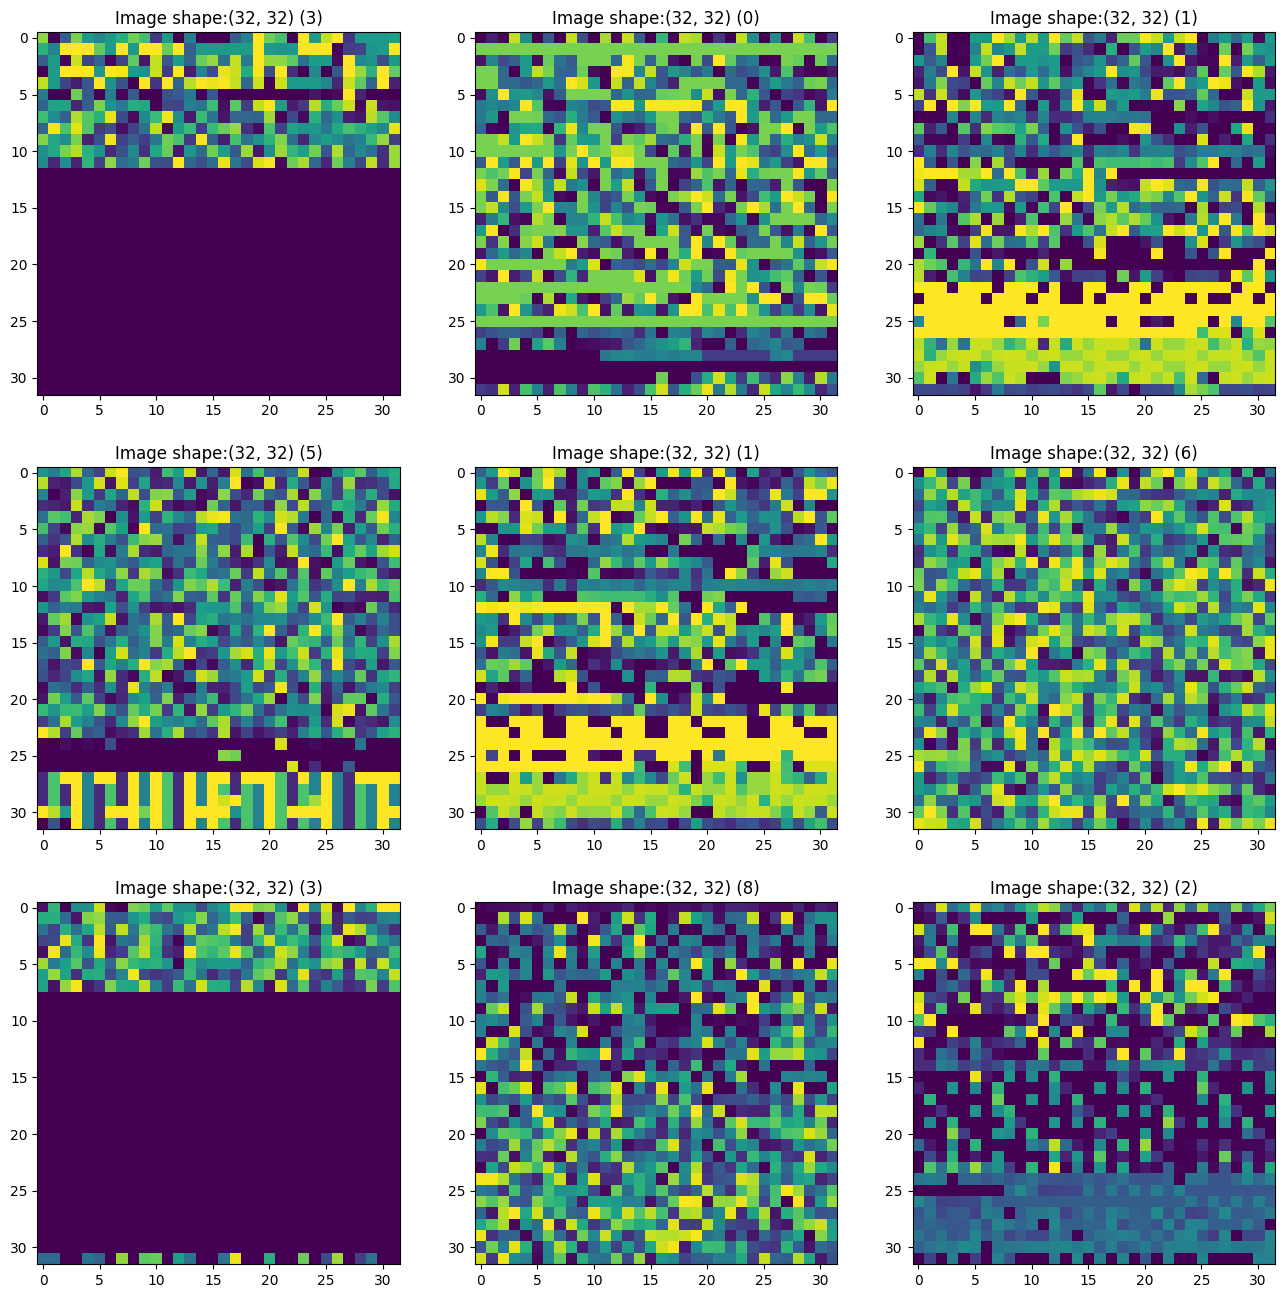

In [ ]:
show_samples(train_data,train_labels)

In [ ]:
def change_image_dim(image,scale_to_change_dim=None):
  image=np.repeat(image[:,:,:,np.newaxis],3,-1)
  return image


In [ ]:
train_data=change_image_dim(train_data,3)
test_data=change_image_dim(test_data,3)

9 Samples from the dataset


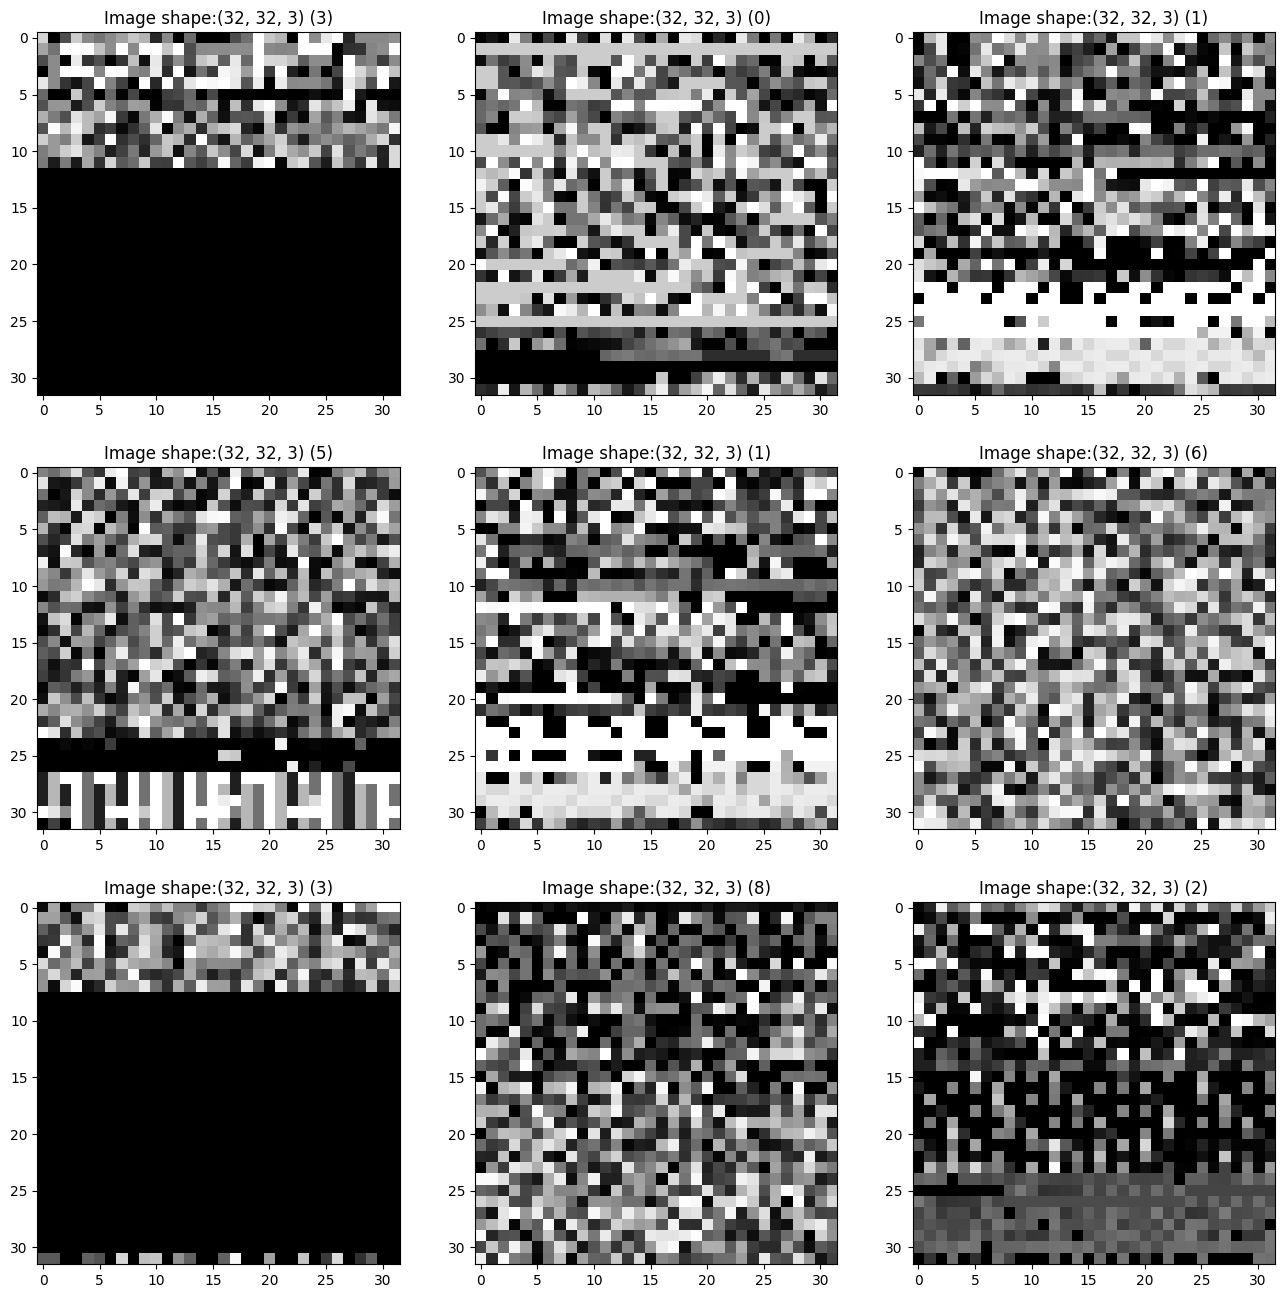

In [ ]:
show_samples(train_data,train_labels)

In [ ]:
# import libraries for preprocessing
# we will use mobileNetV2 using transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

In [ ]:
input_shape=(32,32,3)
base_model=keras.applications.MobileNetV2(input_shape=input_shape,
                                          include_top=False,
                                          weights='imagenet')
base_model.trainable=False

<ipython-input-21-607e4fac93ed>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=keras.applications.MobileNetV2(input_shape=input_shape,


In [ ]:
classes=10

In [ ]:
inputs=tf.keras.Input(shape=input_shape)
x=base_model(inputs,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation='sigmoid'
outputs=tf.keras.layers.Dense(classes,activation=activation,kernel_initializer=initializer)(x)
model=tf.keras.Model(inputs,outputs)

In [ ]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False,
                                              ignore_class=None,
                                              reduction='sum_over_batch_size', # Changed reduction to 'sum_over_batch_size'
                                              name='sparse_categorical_crossentropy')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

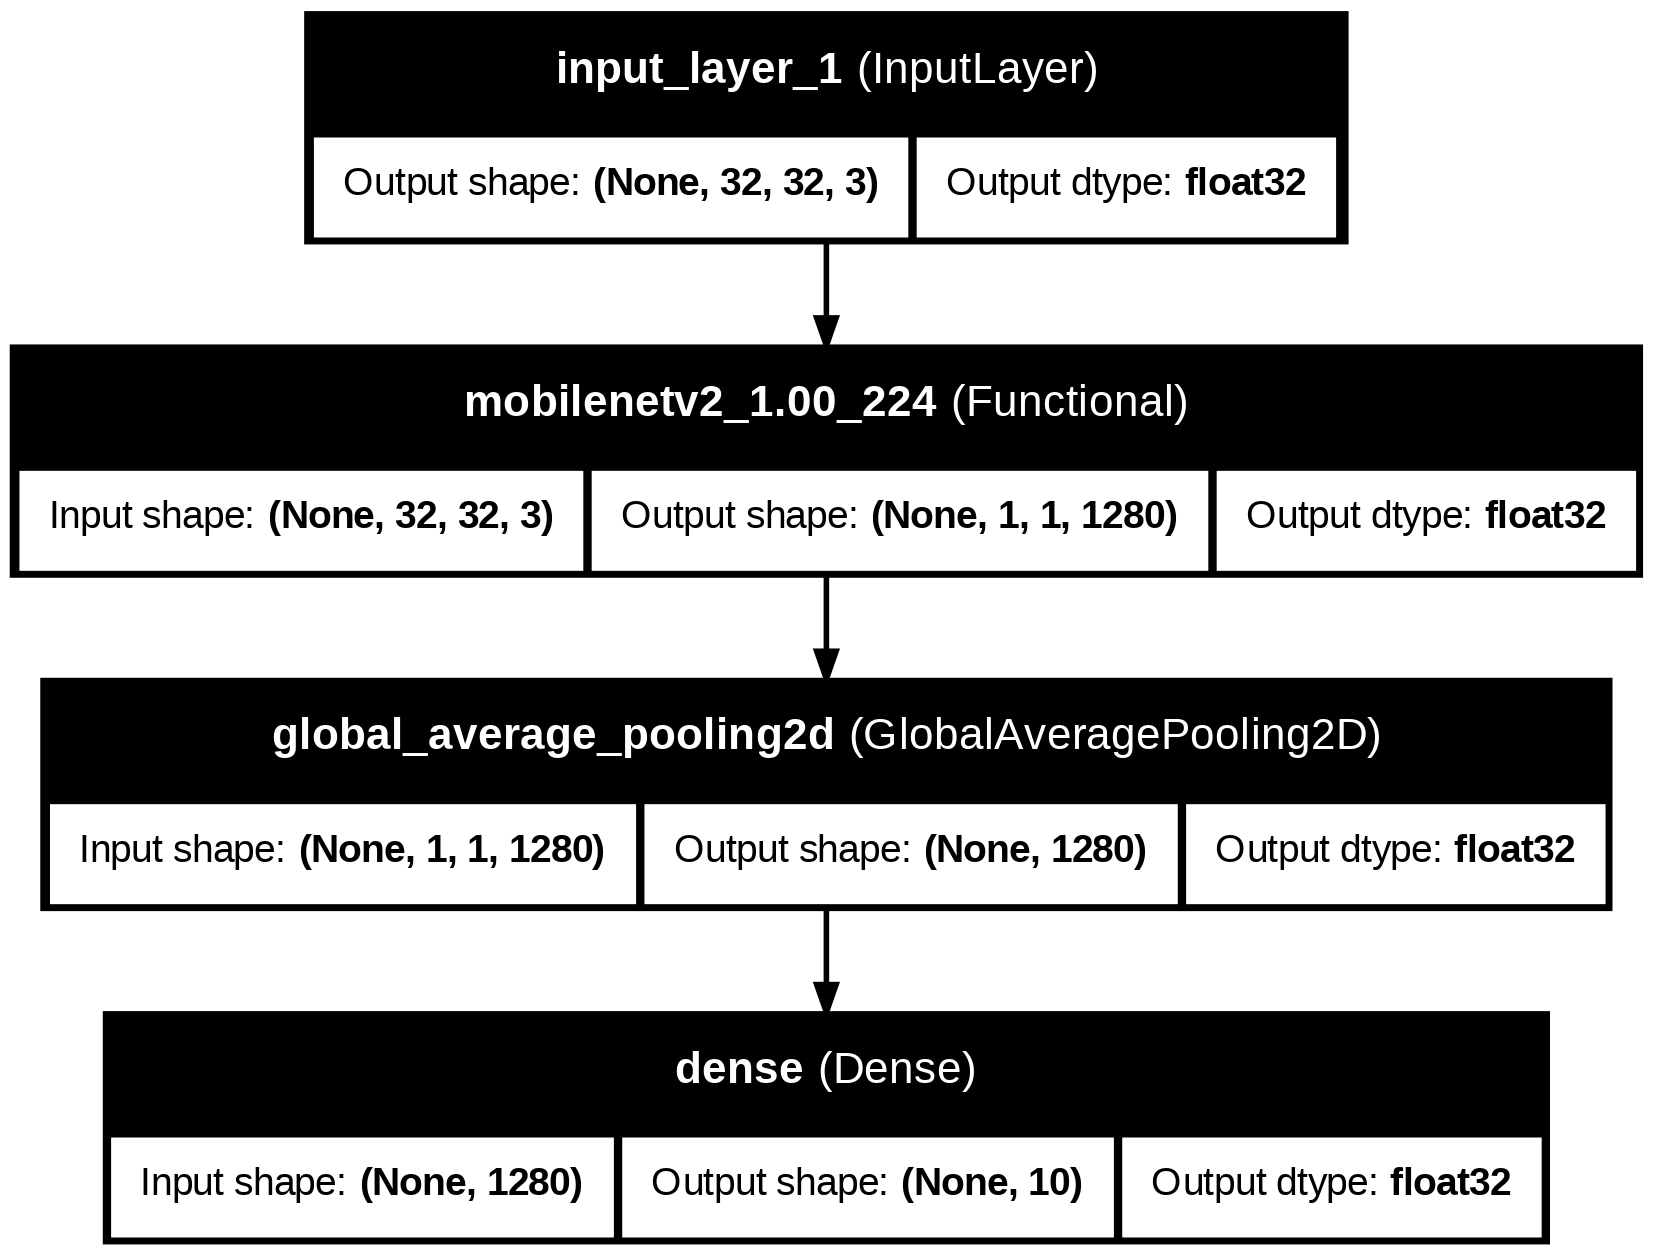

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_dtype=True)

In [ ]:
!pip install visualkeras

In [ ]:
!pip install --upgrade visualkeras pillow


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


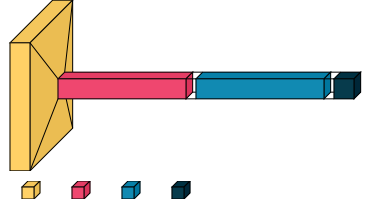

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
# divide data into training datasett and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,train_labels,test_size=0.33,random_state=42)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 74s 60ms/step - accuracy: 0.4301 - loss: 1.8063 - val_accuracy: 0.5477 - val_loss: 1.4224
Epoch 2/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 60s 60ms/step - accuracy: 0.5604 - loss: 1.3880 - val_accuracy: 0.5686 - val_loss: 1.3211
Epoch 3/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 102s 79ms/step - accuracy: 0.5797 - loss: 1.3025 - val_accuracy: 0.5835 - val_loss: 1.2751
Epoch 4/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 73s 71ms/step - accuracy: 0.5949 - loss: 1.2507 - val_accuracy: 0.5875 - val_loss: 1.2497
Epoch 5/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 73s 61ms/step - accuracy: 0.5929 - loss: 1.2390 - val_accuracy: 0.5907 - val_loss: 1.2326
Epoch 6/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.6047 - loss: 1.2146 - val_accuracy: 0.5914 - val_loss: 1.2216
Epoch 7/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.6009 - loss: 1.2046 - val_accuracy: 0.5916 - val_loss: 1.2143
Epoch 8/10
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.6038 

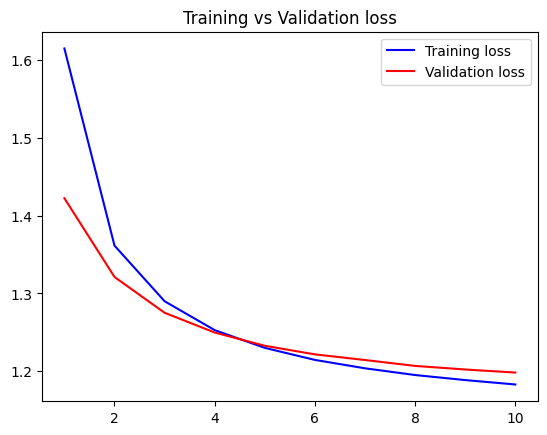

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
epochs=range(1,len(loss)+1)
val_loss=history.history['val_loss']
plt.plot(epochs,loss,color='b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training vs Validation loss')
plt.legend()
plt.show()

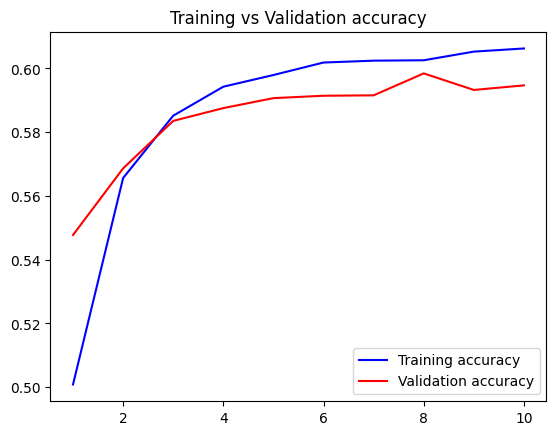

In [ ]:
# in case of accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,color='b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training vs Validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred=model.predict(test_data)

109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step


In [ ]:
results=model.evaluate(test_data,test_labels,batch_size=128)
results

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5930 - loss: 1.1941


[1.1920390129089355, 0.591093122959137]

In [ ]:
for(pre,y_trues) in zip(pred[:15],test_labels[:15]):
  print(f'predicted: {np.argmax(pre)},Actual_label:{y_trues}')

predicted: 2,Actual_label:2
predicted: 6,Actual_label:6
predicted: 6,Actual_label:9
predicted: 1,Actual_label:1
predicted: 7,Actual_label:7
predicted: 6,Actual_label:8
predicted: 5,Actual_label:9
predicted: 7,Actual_label:7
predicted: 2,Actual_label:7
predicted: 6,Actual_label:6
predicted: 1,Actual_label:1
predicted: 2,Actual_label:2
predicted: 6,Actual_label:6
predicted: 6,Actual_label:6
predicted: 5,Actual_label:8
